In [1]:
# import the libiary
import pandas as pd 
import matplotlib.pyplot as plt 

### 決定木を用いて分類問題を解いていきます

In [2]:
# read dataset
from sklearn.datasets import load_iris 
iris = load_iris() 

#to dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['iris name'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


***データセットの意味***  
  
・sepal length (cm):がく片の長さ  
・sepal width (cm):がく片の幅  
・petal length (cm):花びらの長さ  
・petal width (cm):花びらの幅	  
・iris name:花の種類  

**<span style="color: red; ">上4つの説明変数を用いて花の名前(iris name)を分類するモデルを構築していきます**

モデル構築の準備

In [3]:
#import the library  
from sklearn.model_selection import train_test_split

#X
X = iris_df.drop("iris name", axis = 1)

#Y
Y = iris_df["iris name"]

#split the train data and test data to 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

#### 決定木で分類木構築

In [4]:
# import the decisiontree and build the model
from sklearn.tree import DecisionTreeClassifier 

#learning
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf = clf.fit(X_train, Y_train) 

max_depthは構築する木の最大の深さで調整すべきパラメータです。

In [5]:
#import the library
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

#predict
pred = clf.predict(X_test) 
print("混同行列\n", confusion_matrix(Y_test, pred))
print("分類精度\n", classification_report(Y_test, pred))
print("全体の正解率\n", accuracy_score(Y_test, pred))

混同行列
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
分類精度
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

全体の正解率
 0.9666666666666667


高い精度で分類できていることが分かります。

**<span style="color: blue; ">情報利得を算出して分類に寄与する変数の重要度が分かります**

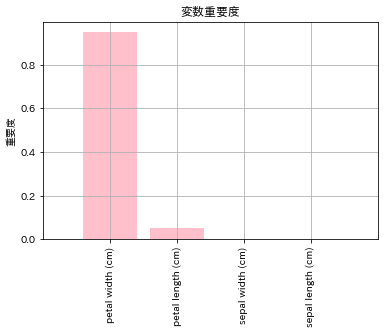

In [6]:
#various important
importances = pd.Series(clf.feature_importances_, index = X.columns)
importances = importances.sort_values(ascending=False)
fig = plt.figure(figsize=(6, 4))
plt.bar([i for i in range(len(importances.values))], 
        list(importances.values), 
        tick_label = list(importances.index),
       color ="pink" )

plt.title("変数重要度")
plt.grid()
plt.xlim(-1, len(importances.values))
plt.xticks(rotation = 90)
plt.ylabel("重要度")
plt.show()

 petal width (cm):花びらの幅  
 petal length (cm):花びらの長さ   
が分類に寄与する変数となっています。

** 構築した木の可視化もできます。**

graphvizを用いる方法

C:\Users\yoichi_ishikawa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


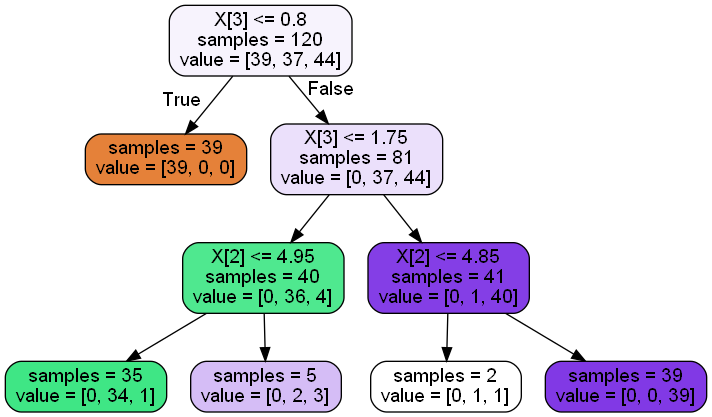

In [7]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dtreevizを用いる方法

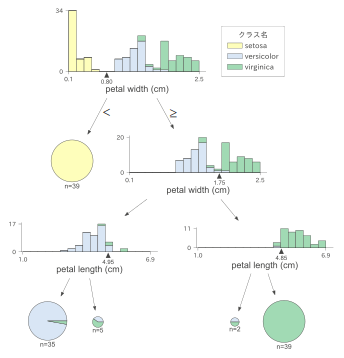

In [8]:
from dtreeviz.trees import dtreeviz 
from cairosvg import svg2png

viz = dtreeviz(
    clf,
    iris.data, 
    iris.target,
    target_name='クラス名',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names],
) 

display(viz)
#svg2png(url= "dtreeviz_tree" + ".svg", write_to="dtreeviz_tree" + ".png")
#viz.save("dtreeviz_tree.svg")